In [25]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage.transform import resize
import cv2
from skimage import exposure

(244, 166, 3)


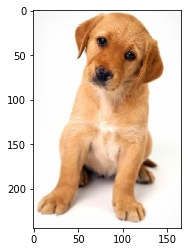

In [26]:
img= cv2.imread("images/puppy.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(img.shape)

<div style="direction: rtl;color: #4E4AE5;font-size: large;">
     سایز تصویر ۶۶۳ در ۴۵۹ است. ما باید تصویر رو به سایز ۶۴ در ۱۲۸ ریسایز کنیم.  .
    <br>
    برای پیش پردازش تصویر باید عرض و طول تصویر رو به نسبت ۱ به ۲ تبدیل شوند. این تصویر ترجیحا باید ۶۴ در ۱۲۸ باشد. به خاطر اینکه ما تصویر رو به بخش هایی ۸ در ۸ و ۱۶ در ۱۶ مسیر (‌patches) برای استخراج ویژگی تبدیل میکنیم. داشتن سایز دقیق ۶۴ در ۱۲۸ م محاسبات را ساده میکند. 
</div>

In [27]:
resized_image=resize(img,(128,64))
print(resized_image.shape)

(128, 64, 3)


<div style="direction: rtl;color: #4E4AE5;font-size: large;">
    اینجا ما از تابع hog از کتابخونه skimage.features به صورت مستقیم استفاده می کنیم. پس خب لازم نیست گرادیان و اندازه و جهت رو به صورت جداگانه حساب کنیم. تابع hog به صورت داخلی تمام این موارد را حساب میکنه و به ماتریس ویژگی ها رو برمیگردونه.

همچنین اگر شما یک پارامتر visualize = True رو تنظیم کنید عکس hog رو برمیگردونه.

</div>

creating hog features fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True)
<div style="direction: rtl;color: #4E4AE5;font-size: large;">
    پارامتر orientations که تعداد bin هایی که میخواهیم بسازیم رو میگم بهش. وقتی که من میخواهم یک ماتریس ۹ در ۱ داشته باشم این پارامتر رو ۹ تنظیم میکنم.
    <br>
    پارامتر pixels_per_cell اندازه سایز هر سلول که میخواهیم ازش هیستوگرام رو بسازیم تعیین میکنیم. توی نمونه ای که در مقاله بررسی کردیم ما از سلول های ۸ در ۸ استفاده کردیم و اینجا هم همین مقادیر رو قرار میدیم. البته میتونید هر مقدار دیگه ای هم باشه.
     <br>
     ارامتر cells_per_block  که سایز هر بلاک رو که میخواهیم نرمالیز کنیم هیستوگرام رو تعیین میکنه. همانطور که گفتیم سلول بر بلاک هست و نباید سایز پیکسل رو بنویسیم به جا نوشتن ۱۶ در ۱۶ ما می نویسیم ۲ در ۲ اینجا
    <br>
    ماتریس ویژگی ساخته شده  از تابع توی متغیری به اسم fd قرار دارد و تصویر روی hog_image قرار دارد. اجازه بدید ماتریس ویژگی ها رو بررسی کنیم
    <br>
    </div>

In [31]:
#creating hog features 
fd, hog_image = hog(resized_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True)
print(fd.shape)
print(fd[1])
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

(3780,)
0.19287974018896323


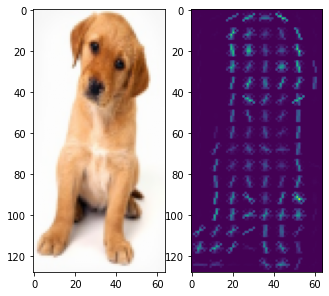

In [34]:
plt.figure(figsize=(8,8))
plt.subplot(1,3,1)
plt.imshow(resized_image)
plt.subplot(1,3,2)
plt.imshow(hog_image_rescaled)



(array([1955.,  593.,  350.,  292.,  381.,  113.,   53.,   28.,   11.,
           4.]),
 array([0.        , 0.06729389, 0.13458778, 0.20188167, 0.26917556,
        0.33646945, 0.40376334, 0.47105722, 0.53835111, 0.605645  ,
        0.67293889]),
 <BarContainer object of 10 artists>)

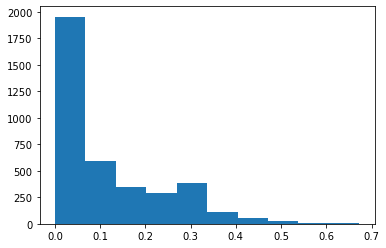

In [35]:
plt.hist(fd)